<h1>Face Detection</h1>

In [1]:
import warnings
warnings.filterwarnings('ignore')
# importing modules
import requests

In [2]:
import tensorflow as tf

In [3]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
face_cascade = cv2.CascadeClassifier('FaceDetection_xml/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('FaceDetection_xml/haarcascade_eye.xml')

In [5]:
def detect(RGBimg,scaleFactor_face=1.3,minNeigbor_face=3,scaleFactor_eye=1.3,minNeigbor_eye=3):
    gray = cv2.cvtColor(RGBimg,cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor_face, minNeigbor_face)
    color_img = RGBimg.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (255, 0, 0), 4)
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = color_img[y:y+h, x:x+w] 
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor_eye, minNeigbor_eye) 
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 3) 
    return color_img

In [6]:
url1 = 'https://jgeekstudies.files.wordpress.com/2016/09/superman-figure-3.jpg'

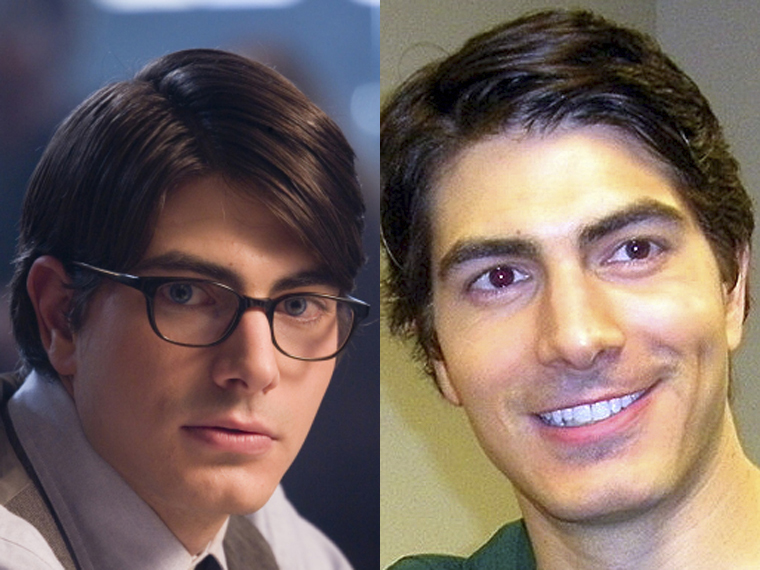

In [7]:
img = Image.open(requests.get(url1, stream=True).raw)
#img = Image.open('LDS8_DeThi_k270/Dataset/face_glasses_1.jpg')
img

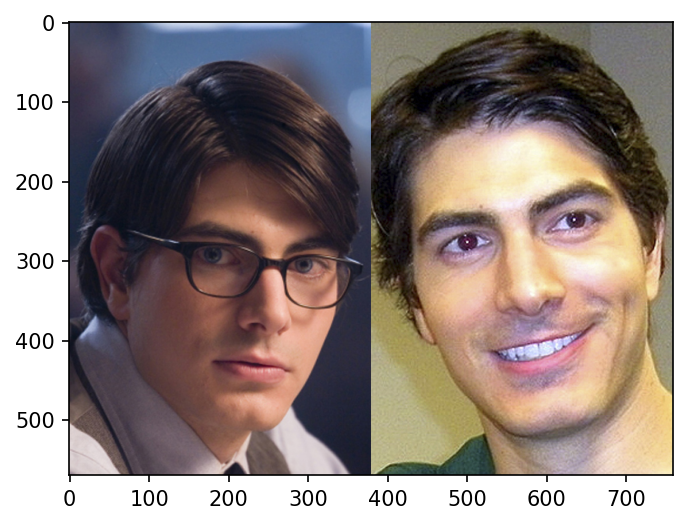

In [8]:
img = np.asarray(img,dtype='uint8')
plt.figure(dpi=150)
plt.imshow(img)
plt.show()

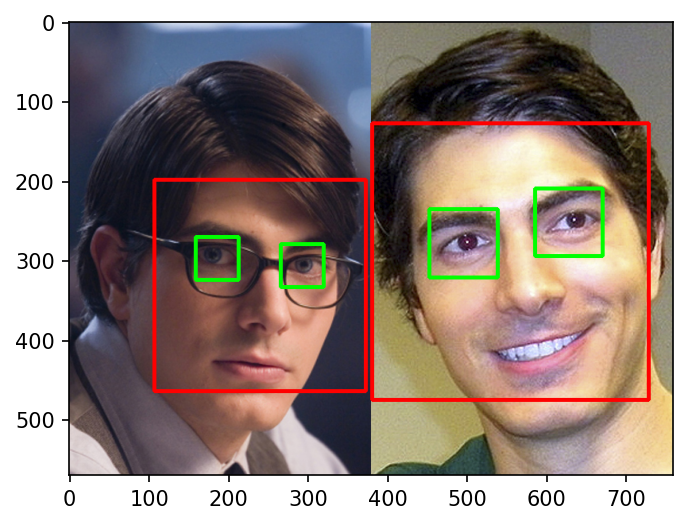

In [14]:
plt.figure(dpi=150)
plt.imshow(detect(img,1.2,2,1.39,2))
plt.show()

<h1>Body detection</h1>

In [15]:
body_cascade = cv2.CascadeClassifier('FaceDetection_xml/haarcascade_fullbody.xml')

In [16]:
def detect_body(RGBimg,scaleFactor=1.2,minNeigbor=5):
    gray = cv2.cvtColor(RGBimg,cv2.COLOR_RGB2GRAY)
    faces = body_cascade.detectMultiScale(gray, scaleFactor, minNeigbor)
    color_img = RGBimg.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return color_img

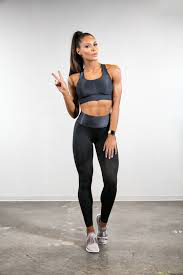

In [17]:
#img2 = Image.open(requests.get(url2, stream=True).raw)
img2 = Image.open('LDS8_DeThi_k270/Dataset/body.jpg')
img2

In [18]:
img2 = np.asarray(img2,dtype='uint8')

In [19]:
# tìm số thích hợp =))
neighbor = 3
while neighbor <= 10:
    scale = 1.1
    while scale <= 1.9:
        plt.imsave('Bodyscale_'+str(scale)+'_neighbor_'+str(neighbor)+'.jpg',detect_body(img2,scale,neighbor))
        scale+=0.01
    neighbor+=1

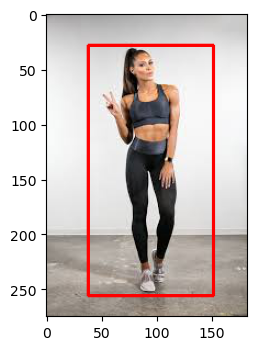

In [20]:
plt.figure(dpi=100)
plt.imshow(detect_body(img2,1.22,3)) # với scaleFactor = 1.22 và minNeighbors = 3 thì đẹp nhất
plt.show()